# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.079750e+01     7.106964e+00
 * time: 0.0040149688720703125
     1     2.673907e+01     4.323056e+00
 * time: 0.01752305030822754
     2     1.849588e+01     3.965219e+00
 * time: 0.03388094902038574
     3     1.217277e+01     2.198522e+00
 * time: 0.05029702186584473
     4     1.160561e+01     2.311949e+00
 * time: 0.06353211402893066
     5     1.063266e+01     1.741673e+00
 * time: 0.07657909393310547
     6     9.837749e+00     1.698551e+00
 * time: 0.09000396728515625
     7     9.276617e+00     1.269161e+00
 * time: 0.10405397415161133
     8     8.727266e+00     1.154256e+00
 * time: 0.22270894050598145
     9     8.243543e+00     8.251475e-01
 * time: 0.23540496826171875
    10     8.049014e+00     5.250417e-01
 * time: 0.24782013893127441
    11     7.978064e+00     3.731112e-01
 * time: 0.26015400886535645
    12     7.938374e+00     2.784109e-01
 * time: 0.2724471092224121
    13     7.908001e+00     3.100359e-01
 * time

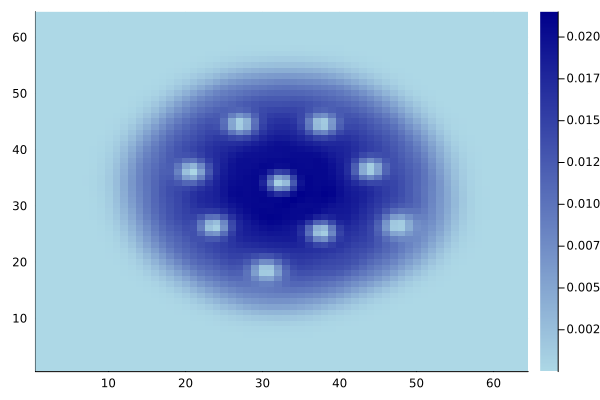

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)